# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/fuel-consumption-co2/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


# Checking Dtypes

In [5]:
d=df.dtypes
n=df.nunique()
pd.DataFrame({'Dtype':d , 'Num_of_unique':n}).T

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
Dtype,int64,object,object,object,float64,int64,object,object,float64,float64,float64,int64,int64
Num_of_unique,1,39,663,16,45,7,22,4,167,118,148,43,159


In [6]:
cols = ['MAKE' , 'MODEL' , 'VEHICLECLASS' , 'TRANSMISSION' , 'FUELTYPE']
df[cols] = df[cols].astype('category')
d=df.dtypes
n=df.nunique()
pd.DataFrame({'Dtype':d , 'Num_of_unique':n}).T


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
Dtype,int64,category,category,category,float64,int64,category,category,float64,float64,float64,int64,int64
Num_of_unique,1,39,663,16,45,7,22,4,167,118,148,43,159


# Handling Missing Values

In [7]:
n = df.isnull().sum()
r = 100*n/df.shape[0]
pd.DataFrame({'Num_of_nulls':n , 'Ration_of_nulls':r}).T

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
Num_of_nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ration_of_nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Handlin Outliers

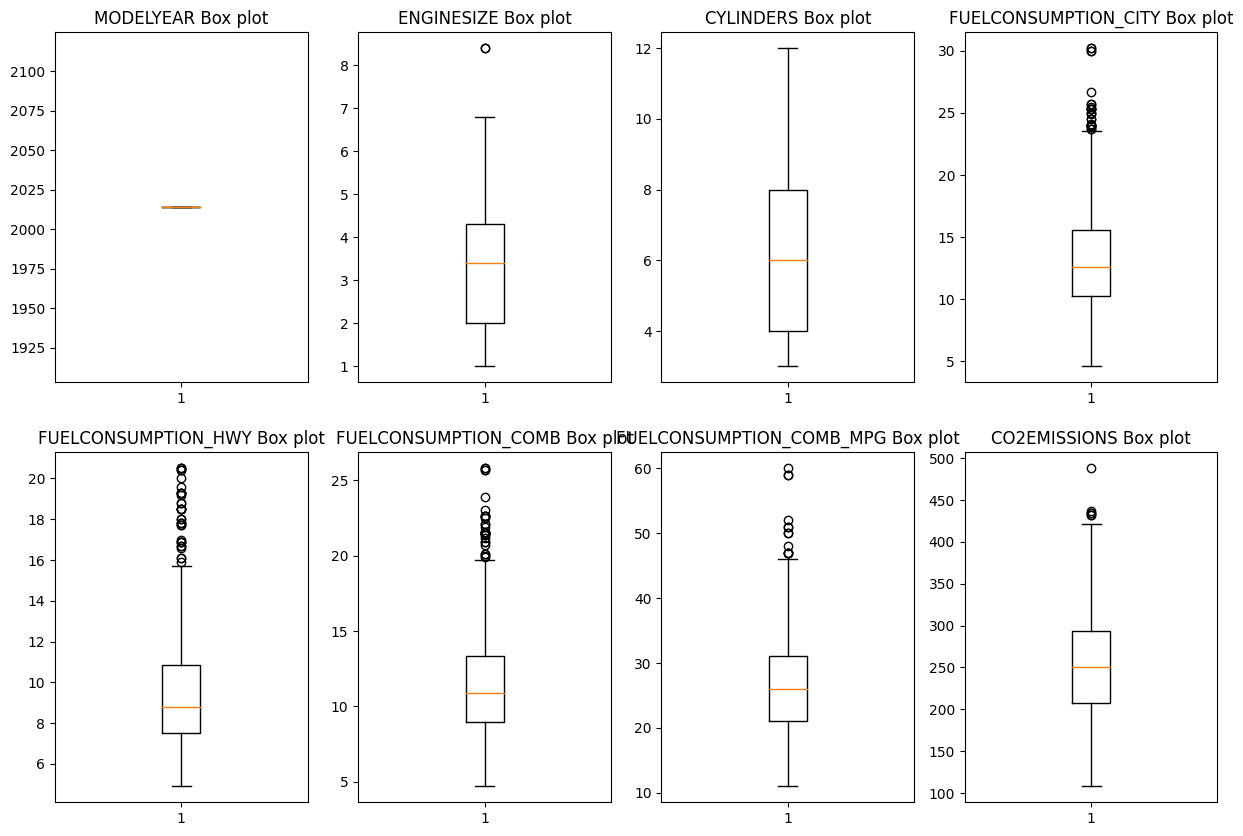

In [8]:
numeric_col = df.select_dtypes('number').columns
numeric_col
plt.figure(figsize=(15,10))
for i , col in enumerate(numeric_col):
    plt.subplot(2,4,i+1)
    plt.boxplot(df[col])
    plt.title(f'{col} Box plot')
plt.show()

In [9]:
for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    UP_FENNCE = Q3 + 1.5 * IQR
    LO_FENNCE = Q1 - 1.5 * IQR
    lowOutlier = df[df[col] < LO_FENNCE][col].values
    upOutlier = df[df[col] > UP_FENNCE][col].values
    df[col].replace(lowOutlier, LO_FENNCE, inplace=True)
    df[col].replace(upOutlier, UP_FENNCE, inplace=True)

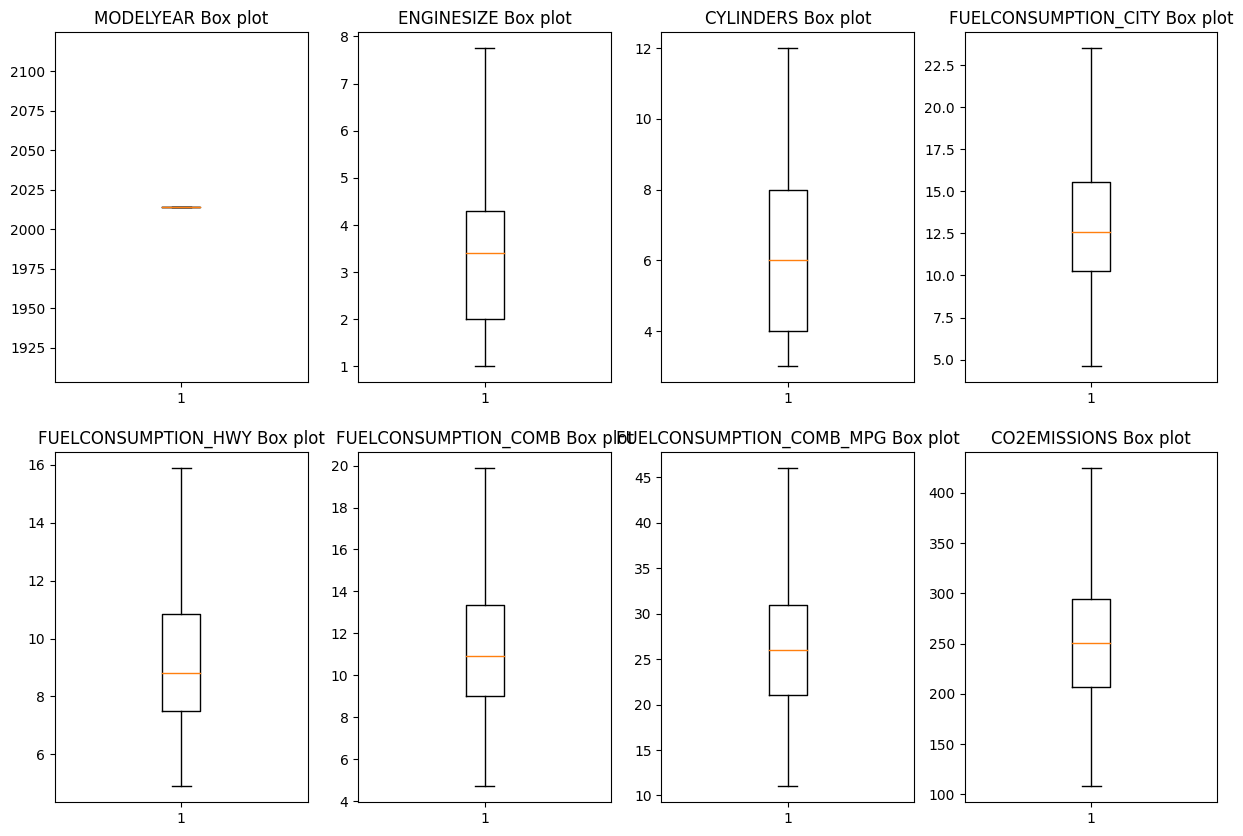

In [10]:
numeric_col = df.select_dtypes('number').columns
numeric_col
plt.figure(figsize=(15,10))
for i , col in enumerate(numeric_col):
    plt.subplot(2,4,i+1)
    plt.boxplot(df[col])
    plt.title(f'{col} Box plot')
plt.show()

# Visualizations

>>Histogram

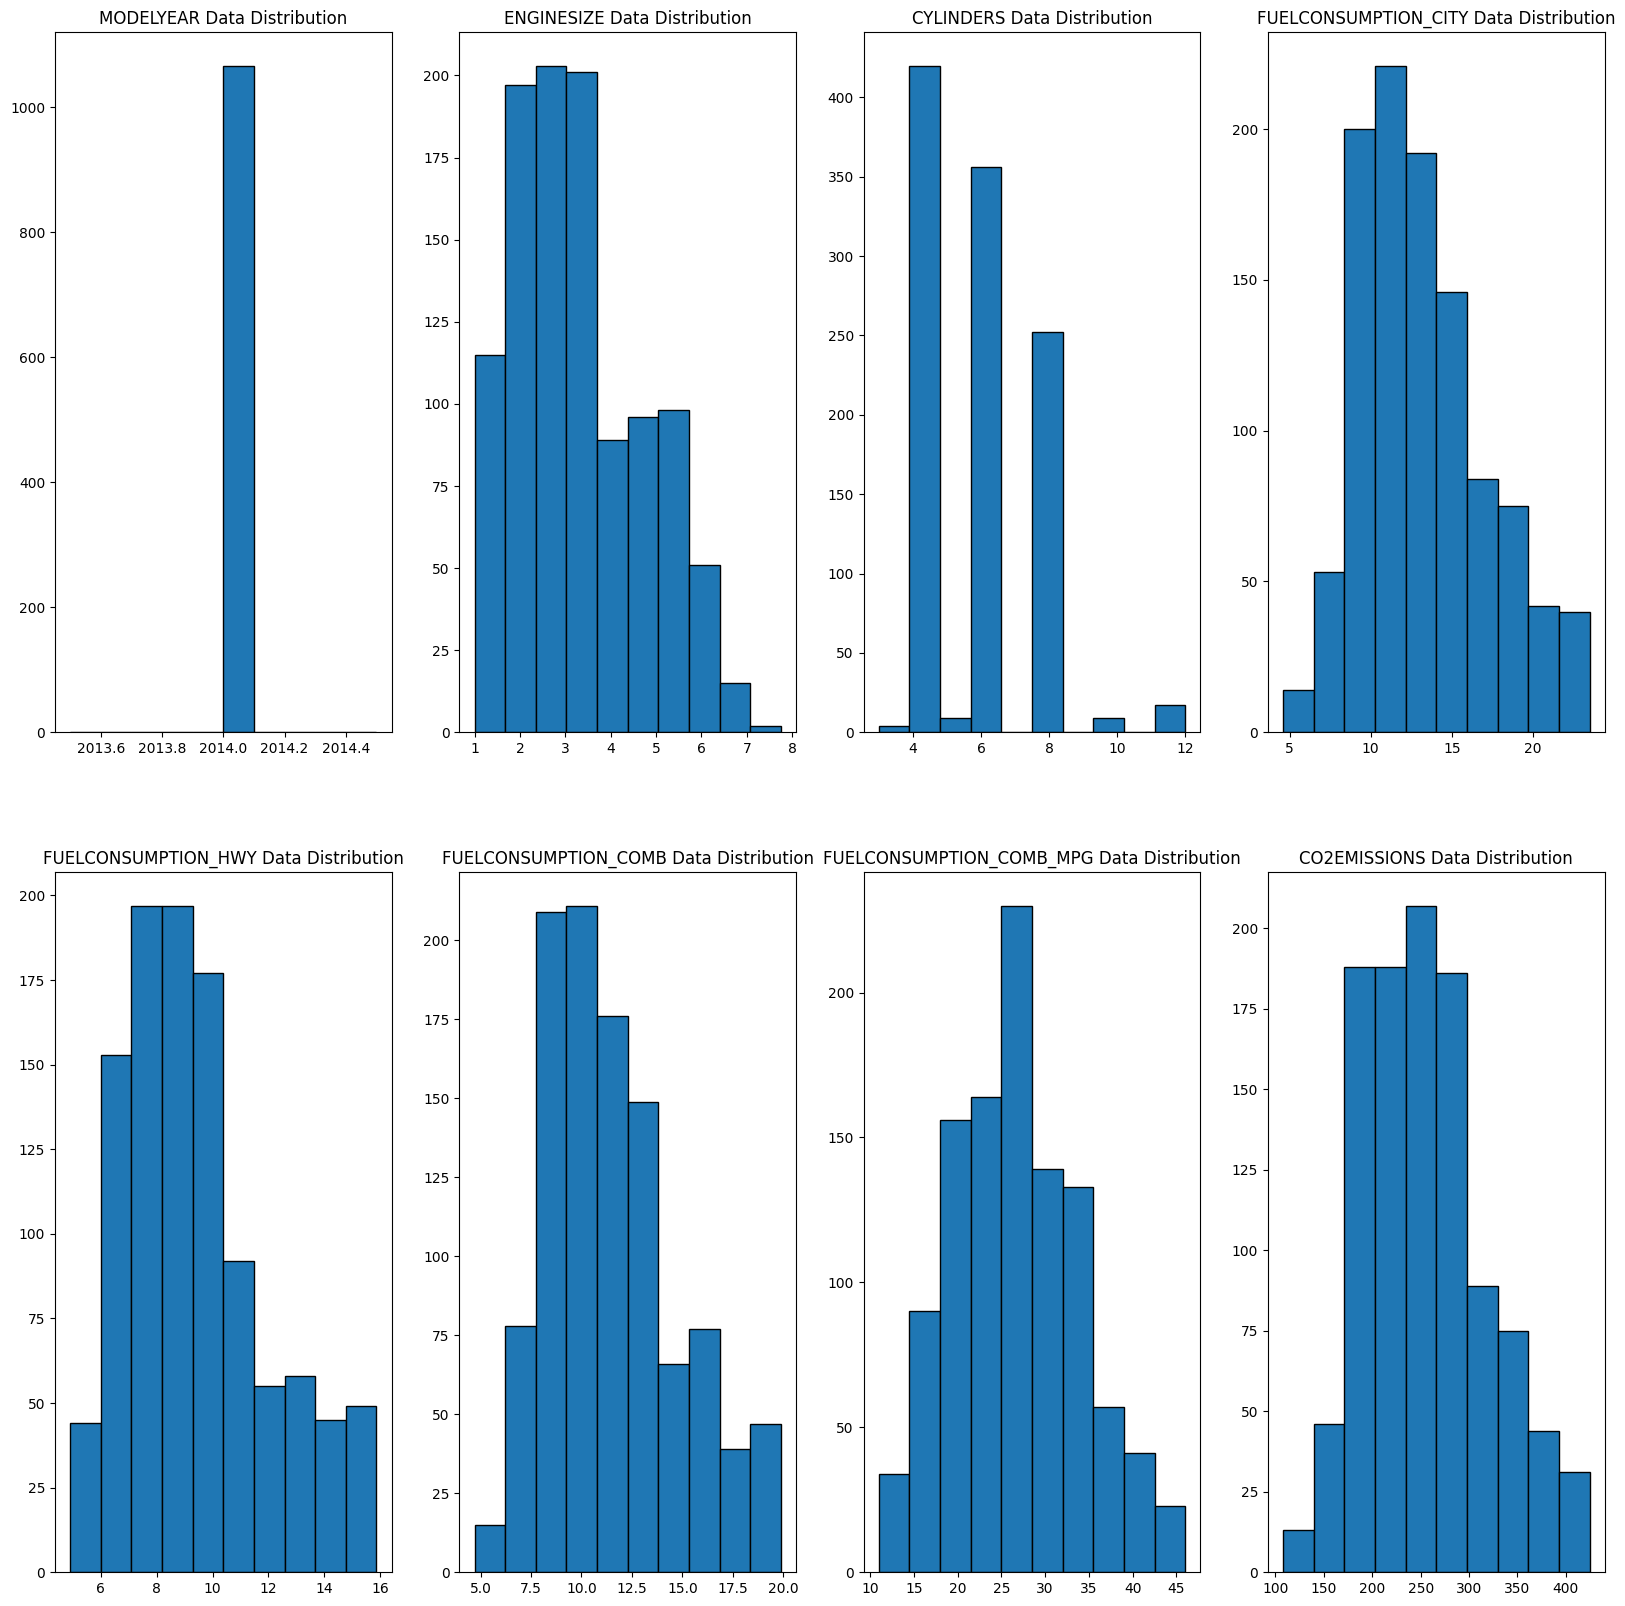

In [11]:
Numeric_columns = df.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(20,20))
for i , col in enumerate(Numeric_columns):
    plt.subplot(2,4,i+1)
    plt.hist(df[col] , edgecolor='k')
    plt.title(f'{col} Data Distribution')
plt.show()

>>KDE

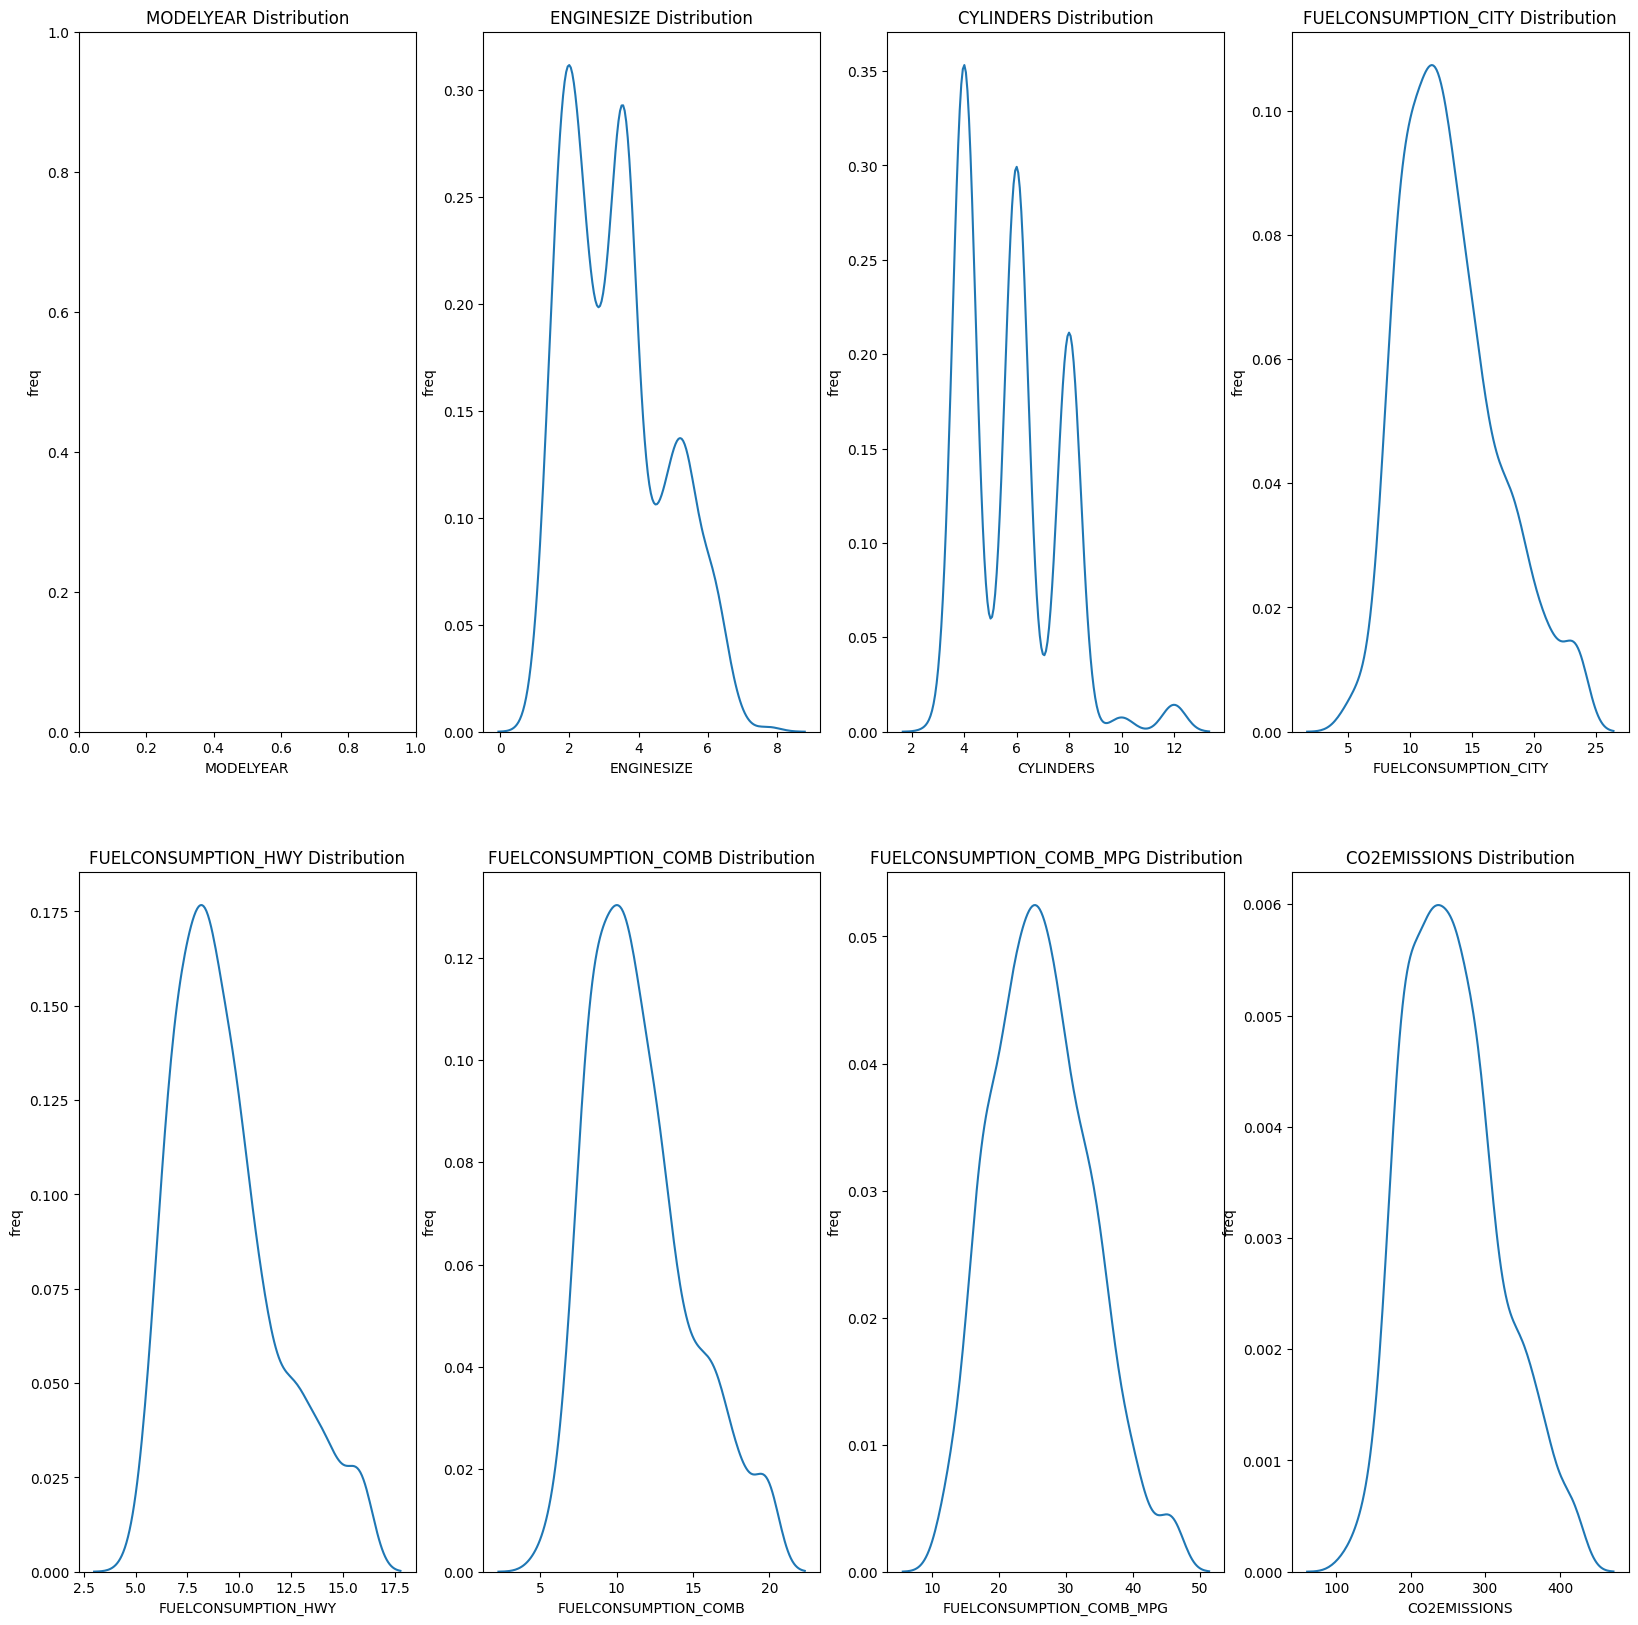

In [12]:
Numeric_columns = df.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(20,20))
for i , col in enumerate(Numeric_columns):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df[col])
    plt.xlabel(col)
    plt.ylabel('freq')
    plt.title(f'{col} Distribution')
plt.show()

# Removing Duplicates

In [13]:
df.duplicated().sum()

0

# Data Splitting

In [14]:
x=df.drop(['CO2EMISSIONS'] , axis=1)
y=df[['CO2EMISSIONS']]

In [15]:
x.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,46
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27


In [16]:
y.head()

,CO2EMISSIONS
0,196.0
1,221.0
2,136.0
3,255.0
4,244.0


# Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler
numCol = df.select_dtypes('number').columns
scaler = MinMaxScaler()
scaler.fit(df[numCol])
df[numCol] = scaler.transform(df[numCol])
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0.0,ACURA,ILX,COMPACT,0.148148,0.111111,AS5,Z,0.280423,0.164009,0.250412,0.628571,0.278041
1,0.0,ACURA,ILX,COMPACT,0.207407,0.111111,M6,Z,0.349206,0.255125,0.322900,0.514286,0.357030
2,0.0,ACURA,ILX HYBRID,COMPACT,0.074074,0.111111,AV7,Z,0.074074,0.082005,0.079077,1.000000,0.088468
3,0.0,ACURA,MDX 4WD,SUV - SMALL,0.370370,0.333333,AS6,Z,0.428571,0.382688,0.421746,0.400000,0.464455
4,0.0,ACURA,RDX AWD,SUV - SMALL,0.370370,0.333333,AS6,Z,0.396825,0.346241,0.388797,0.457143,0.429700
5,0.0,ACURA,RLX,MID-SIZE,0.370370,0.333333,AS6,Z,0.386243,0.255125,0.349259,0.485714,0.385466
6,0.0,ACURA,TL,MID-SIZE,0.370370,0.333333,AS6,Z,0.380952,0.291572,0.355848,0.485714,0.391785
7,0.0,ACURA,TL AWD,MID-SIZE,0.400000,0.333333,AS6,Z,0.433862,0.373576,0.421746,0.400000,0.464455
8,0.0,ACURA,TL AWD,MID-SIZE,0.400000,0.333333,M6,Z,0.465608,0.419134,0.454695,0.371429,0.502370
9,0.0,ACURA,TSX,COMPACT,0.207407,0.111111,AS5,Z,0.317460,0.236902,0.296540,0.571429,0.328594


# Encoding

In [18]:
df['FUELTYPE'].replace(df['FUELTYPE'].unique(), [0,1,2,3], inplace=True)
df['MODELYEAR'].replace(df['MODELYEAR'].unique(), [11], inplace=True)
df['VEHICLECLASS'].replace(df['VEHICLECLASS'].unique(), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], inplace=True)
df['TRANSMISSION'].replace(df['TRANSMISSION'].unique(), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], inplace=True)
for i in range(39):
    l=i+1
df['MAKE'].replace(df['MAKE'].unique(),l, inplace=True)
for j in range(663):
    k=j+1
df['MODEL'].replace(df['MODEL'].unique(),k, inplace=True)
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,11.0,39,663,0,0.148148,0.111111,0,0,0.280423,0.164009,0.250412,0.628571,0.278041
1,11.0,39,663,0,0.207407,0.111111,1,0,0.349206,0.255125,0.322900,0.514286,0.357030
2,11.0,39,663,0,0.074074,0.111111,2,0,0.074074,0.082005,0.079077,1.000000,0.088468
3,11.0,39,663,1,0.370370,0.333333,3,0,0.428571,0.382688,0.421746,0.400000,0.464455
4,11.0,39,663,1,0.370370,0.333333,3,0,0.396825,0.346241,0.388797,0.457143,0.429700
5,11.0,39,663,2,0.370370,0.333333,3,0,0.386243,0.255125,0.349259,0.485714,0.385466
6,11.0,39,663,2,0.370370,0.333333,3,0,0.380952,0.291572,0.355848,0.485714,0.391785
7,11.0,39,663,2,0.400000,0.333333,3,0,0.433862,0.373576,0.421746,0.400000,0.464455
8,11.0,39,663,2,0.400000,0.333333,1,0,0.465608,0.419134,0.454695,0.371429,0.502370
9,11.0,39,663,0,0.207407,0.111111,0,0,0.317460,0.236902,0.296540,0.571429,0.328594


In [19]:
df[1055:1066]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1055,11.0,39,663,8,0.296296,0.333333,7,1,0.407407,0.282460,0.375618,0.457143,0.546603
1056,11.0,39,663,0,0.222222,0.222222,3,2,0.354497,0.264237,0.329489,0.514286,0.363349
1057,11.0,39,663,0,0.222222,0.222222,3,2,0.370370,0.309795,0.355848,0.485714,0.391785
1058,11.0,39,663,0,0.296296,0.333333,3,2,0.455026,0.419134,0.448105,0.400000,0.492891
1059,11.0,39,663,2,0.325926,0.333333,3,2,0.386243,0.291572,0.362438,0.485714,0.401264
1060,11.0,39,663,2,0.296296,0.333333,3,2,0.455026,0.419134,0.448105,0.400000,0.492891
1061,11.0,39,663,1,0.325926,0.333333,3,2,0.444444,0.364465,0.428336,0.400000,0.473934
1062,11.0,39,663,1,0.296296,0.333333,3,2,0.465608,0.446469,0.467875,0.371429,0.515008
1063,11.0,39,663,1,0.325926,0.333333,3,2,0.455026,0.419134,0.448105,0.400000,0.492891
1064,11.0,39,663,1,0.296296,0.333333,3,2,0.465608,0.446469,0.467875,0.371429,0.515008


# (Linear Regression) with Sklearn

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Selecting features and target
x=df.drop(['CO2EMISSIONS'] , axis=1)
y=df['CO2EMISSIONS']

# Splitting the data into training and testing sets
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)


# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(x_train , y_train)

# Making predictions
Lr_predict = model.predict(x_test)
Real_Vs_Predict = pd.DataFrame({'Real': y_test, 'predicted': np.round(Lr_predict)})


# Evaluating the model
mse = mean_squared_error(y_test,Lr_predict)
mae = mean_absolute_error(y_test, Lr_predict)
r2 = r2_score(y_test, Lr_predict)

# Results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
Real_Vs_Predict.corr()
Real_Vs_Predict.corr()



Mean Squared Error: 0.0034339088896405898
Mean Absolute Error: 0.04188717320408392
R² Score: 0.9164587056906848


,Real,predicted
Real,1.00000,0.78547
predicted,0.78547,1.00000


# polynomial regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# Selecting features and target
x=df.drop(['CO2EMISSIONS'] , axis=1)
y=df['CO2EMISSIONS']


# Creating polynomial features 
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)


# Splitting the data into training and testing sets
x_train , x_test , y_train , y_test = train_test_split(x_poly , y , test_size=0.25 , random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(x_train , y_train)

# Making predictions
Pr_predict = model.predict(x_test)
Real_Vs_Predict = pd.DataFrame({'Real': y_test, 'predicted': np.round(Pr_predict)})


# Evaluating the model
mse = mean_squared_error(y_test, Pr_predict)
mae = mean_absolute_error(y_test, Pr_predict)
r2 = r2_score(y_test, Pr_predict)


# Results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
Real_Vs_Predict.corr()

Mean Squared Error: 0.0005746029554025814
Mean Absolute Error: 0.008022775000784356
R² Score: 0.9860774702761326


,Real,predicted
Real,1.000000,0.812645
predicted,0.812645,1.000000
